<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Post-Extraction-data-processing" data-toc-modified-id="Post-Extraction-data-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Post-Extraction data processing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dealing-with-videos-registered-at-different-fps-(frame-x-second)" data-toc-modified-id="Dealing-with-videos-registered-at-different-fps-(frame-x-second)-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Dealing with videos registered at different fps (frame x second)</a></span></li></ul></li><li><span><a href="#Dealing-with-not-found-keypoints" data-toc-modified-id="Dealing-with-not-found-keypoints-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dealing with not found keypoints</a></span><ul class="toc-item"><li><span><a href="#Evaluating-the-situation" data-toc-modified-id="Evaluating-the-situation-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Evaluating the situation</a></span></li><li><span><a href="#Strategies-for-NaN-values" data-toc-modified-id="Strategies-for-NaN-values-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Strategies for NaN values</a></span></li><li><span><a href="#Swapping-wrong-coordinates" data-toc-modified-id="Swapping-wrong-coordinates-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Swapping wrong coordinates</a></span></li></ul></li><li><span><a href="#Smoothing-the-movement" data-toc-modified-id="Smoothing-the-movement-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Smoothing the movement</a></span></li><li><span><a href="#Creating-the-input-data:-Euclidean-distance-matrix" data-toc-modified-id="Creating-the-input-data:-Euclidean-distance-matrix-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating the input data: Euclidean distance matrix</a></span></li><li><span><a href="#Normalization-steps" data-toc-modified-id="Normalization-steps-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normalization steps</a></span><ul class="toc-item"><li><span><a href="#Normalization-type-1:-rescaling-by-torso-length" data-toc-modified-id="Normalization-type-1:-rescaling-by-torso-length-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Normalization type 1: rescaling by torso length</a></span></li><li><span><a href="#Normalization-type-2:-rescaling-by-$[x-min(x)]/[max(x)-min(x)]$" data-toc-modified-id="Normalization-type-2:-rescaling-by-$[x-min(x)]/[max(x)-min(x)]$-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Normalization type 2: rescaling by $[x-min(x)]/[max(x)-min(x)]$</a></span></li><li><span><a href="#Normalization-type-3:-rescaling-by-arm-length" data-toc-modified-id="Normalization-type-3:-rescaling-by-arm-length-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Normalization type 3: rescaling by arm length</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import time
sys.path.append("../module/")
from Pose_Retrival_All_class import *

# Post-Extraction data processing
OpenPose is an extremely powerful classifier, since it is able to retrieve data keypoints in a fast and accurate way. However, it is not perfect. Indeed, as we have seen running some videos, sometimes it retrieves wrong coordinates, sometimes it is not able to retrieve some of them at all, and other times the output results in a mechanical movement that seems un-natural.

In this part of our work, we deal with these issues and we present our thoughts on how to best tackle them.

###  Dealing with videos registered at different fps (frame per second)
First of all, we notice that there are 55 videos whose coordinates matrices don't have the shape that we expected.
Indeed, we would expect the matrices to have shape (n, m), where n=16 is the number of  body-parts retrived, and m=150 is the number of frames retrieved. Notably, we would expect m=150 because all the videos last for 10 seconds, and our class is set to retrieve half of the frames (15fps in this case), the coordinate matrices should all have shape of (16,150). 


The reason for the above discrepancy is that those 55 videos have been recorded with less than 30 frames per second. So instead of discarding those videos, we re-run the OpenPose model contained in 'Pose_Retrival_class.py' setting the 'divider' argument to 1, so that no frame is skipped.

These new coordinate matrices are then added in the respective folders.

In [ ]:
def is_in_shape(directory,expected_shape):
    """    
    It prints the directory and name of the CSV files containing the coordinates 
    matrices, if the shape of the coordinate matrix is different from the 
    expected one.
    
    Parameters
    ----------
    directory: directory
    expected_shape: tuple of the form (number of keypoints, number of frame)
    
    Returns
    --------
    lst: list
    """
    
    lst = []
    for folders in os.listdir(directory):
        print(folders)
        DIR = directory+folders+'/'
        for file in os.listdir(DIR):
              file_df = pd.read_csv(DIR+file)
              if file_df.values.shape != expected_shape:
                  lst.append(DIR+file)
                  print(DIR+file, file_df.values.shape)
    print(" ")
    print(f"There are {len(lst)} videos that don't comply with the expected shape.")
    return lst

lst = is_in_shape('../pose_output/',(16,150))

bad_back_round
../pose_output_first/bad_back_round/1113_squat_000126.csv (16, 75)
../pose_output_first/bad_back_round/1113_squat_000127.csv (16, 75)
../pose_output_first/bad_back_round/1113_squat_000128.csv (16, 75)
../pose_output_first/bad_back_round/1113_squat_000129.csv (16, 75)
../pose_output_first/bad_back_round/1113_squat_000130.csv (16, 75)
../pose_output_first/bad_back_round/1113_squat_000131.csv (16, 75)
../pose_output_first/bad_back_round/1113_squat_000132.csv (16, 75)
../pose_output_first/bad_back_round/1113_squat_000133.csv (16, 75)
bad_back_warp
../pose_output_first/bad_back_warp/1113_squat_000134.csv (16, 75)
../pose_output_first/bad_back_warp/1113_squat_000135.csv (16, 75)
../pose_output_first/bad_back_warp/1113_squat_000136.csv (16, 75)
../pose_output_first/bad_back_warp/1113_squat_000137.csv (16, 75)
../pose_output_first/bad_back_warp/1113_squat_000138.csv (16, 75)
../pose_output_first/bad_back_warp/1113_squat_000139.csv (16, 75)
../pose_output_first/bad_back_warp/1113

In [ ]:
def retrieve_path(directory):
    """
    Finds the path of the video given the path of the coordinate file.
    
    Parameters
    ----------
    directory: directory
    
    Returns
    --------
    l: list
    
    """
    l = []
    for path in directory:
        path = os.path.normpath(path)
        lst = path.split(os.sep)
        path = lst[0]+'/Video_Dataset/'+lst[2]+lst[3][9:-3]+'mp4'
        l.append(path)
    return l

list_path_wrong_shape = retrieve_path(lst)

In [ ]:
"""
Re-run the openpose algorithm 
"""
#from Pose_Retrival_class import PoseRetrival
#for path in list_path_wrong_shape:
    #pose = PoseRetrival(path, all_frame=True)
    #pose.model()

'\nRe-run the openpose algorithm\n'

In [ ]:
#Now all the coordinates matrices have the right dimension
lst = is_in_shape('../pose_output/', (16,150))
assert len(lst)==0

bad_back_round
bad_back_warp
bad_head
bad_innner_thigh
bad_shallow
bad_toe
good


---
##  Dealing with not found keypoints

###  Evaluating the situation

A relevant issue we encountered is that OpenPose is not always able to detect all keypoints, and in those cases it outputs null coordinates. The aforementioned situation could happen for different reasons: when the OpenPose's confidence in the keypoint coordinate is lower then the threshold set (0.15), when the keypoints are not present in the video, or they are in a dark part of the image, or are obscured by other keypoints. 

Below, we retrieve the not found keypoints in order to understand better the phenomenon (how often it happens, if there are body parts that are more difficult to detect), and we show some visualizations.


In [ ]:
def difficult_keypoints(keypoint_matrix):
    
    """
    Given a matrix coordinate of a video, it returns how many times
    each keypoint is not detected in the video.
    
    Parameters
    ----------
    keypoint_matrix: pandas.DataFrame
    
    Returns
    -------
    df_null: pandas.Series

    """
    df = keypoint_matrix
    df.index = BODY_PARTS
    df_null = df.isnull()
    df_null = df_null.sum(axis=1)
    df_null.sort_values(ascending=False,inplace=True)
    
    return df_null

In [ ]:
def retrieve_no_keypoint(directory):
    """
    Retrieves the keypoints that OpenPose does not detect (that are null in the 
    coordinate matrix) and it returns a dataframe differentiating them for 
    keypoint and folder (type of squat mistake).
    
    Parameters
    ----------
    directory: directory
        Folder where there are the OpenPose output.
    
    Returns
    -------
    data_no_keypoints: pandas.DataFrame
    
    """
    data_no_keypoints = pd.DataFrame()
    for folders in os.listdir(directory):
        DIR = directory+folders+'/'
        fol_keys = 0
        for file in os.listdir(DIR):
            if not file.startswith('distance'):
                file_df = pd.read_csv(DIR+file)
                no_keypoint_file = difficult_keypoints(file_df)
                fol_keys += no_keypoint_file
        data_no_keypoints[folders] = fol_keys

    data_no_keypoints = data_no_keypoints.drop(['Background'])

    return data_no_keypoints

data_no_keypoints = retrieve_no_keypoint('../pose_output/')
print(f"The OpenPose algorithm does not classify {data_no_keypoints.sum().sum()} keypoints,")
num_videos = 2054 # Number of vidoes
print(f"consisting in the {round((data_no_keypoints.sum().sum()/(num_videos*150*15)),5)} of the total number of keypoints.")

The OpenPose algorithm does not classify 273399 keypoints,
consisting in the 0.05916 of the total number of keypoints.


In [ ]:
""" Missing values by keypoint and squat label """

cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
data_no_keypoints.style.background_gradient(cmap = cm, axis=0) 

,bad_back_round,bad_back_warp,bad_head,bad_innner_thigh,bad_shallow,bad_toe,good
Head,6205,2494,1035,641,2340,1167,1642
LAnkle,5179,2470,5938,1302,1815,5809,2592
LKnee,2717,796,2859,362,362,2564,1165
RKnee,3662,1708,3976,926,408,2830,2097
RAnkle,5097,2818,6558,1748,1818,5772,3301
LWrist,9434,8545,6238,4368,7981,5464,7726
LShoulder,1842,806,267,312,828,382,646
RWrist,9933,9669,6114,4403,7478,5689,8320
LElbow,5904,4852,2128,1944,3871,2234,4056
RShoulder,2394,895,181,255,768,350,610


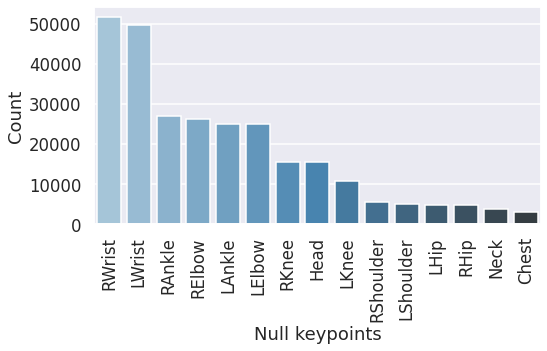

In [ ]:
""" Count of null keypoints by body-part """

data_no_keypoints_sum = data_no_keypoints.sum(axis=1).sort_values(ascending=False)

sns.set(style='darkgrid')
sns.set_context('talk')
fig, axis = plt.subplots(figsize = (8, 4))
sns.barplot(x=data_no_keypoints_sum.index, y=data_no_keypoints_sum.values, 
            palette=("Blues_d"))
plt.ylabel('Count')
plt.xlabel('Null keypoints')
plt.xticks(rotation=90);

### Strategies for NaN values


As we can see from the above dataframes, OpenPose yields missing keypoints across all squat categories and all body-parts, although with different intensities. While this may sound worrying in one way, it represents only 5% of the total number of keypoints. 

We can see that the algorithm fails mostly in detecting the wrists (36%), ankles (20%), and elbows (18.7%). The reason why is that those body parts aren't visible in a number of videos, where the subject is seen from the side.

Here, there are some **strategies** that we discuss to deal with this problem and the drawbacks that they have: 

- **A) Drop frames with NaNs**
    > <span style="color:blue">  **Drawback:** </span> There are too many null many keypoints. We would have to drop the entire distance matrix of a frame even if just 1 on 17 keypoint is missing. The result would be a poor dataset, most likely with different dimensions and deformed pose.
    >
    >  <span style="color: #D60D26"> **Not implemented**  </span>
    
- **B) Drop body-parts with NaNs**
    > <span style="color:blue"> **Drawback:** </span> It does not really solve the problem since the null keypoints affect all the keypoints, as seen above. Furthermore, we may lose signal information also in this case
    >
    >  <span style="color: #D60D26"> **Not implemented**  </span>
 
- **C) Impute missing keypoints**
    >
    > We create an algorithm that assigns to the null keypoints the respective coordinates found in the previous frame (or the subsequent one in case the previous is also null).  
    >
    > <span style="color:blue"> **Drawback:** </span> It can happen that the coordinates in the preceding frame (or next) are not the same. Despite of being inexact, we believe that it is a good proxy since a frame is captured every 60 milliseconds, and, thus, from a frame to the another the human movement is imperceptible. 
    >
    >  <span style="color:green"> **Implemented** </span>

- **D) Manually impute missing keypoints**
    >
    > Previous strategies still yield an unresolved issue: a keypoint may not be detected in a number of subsequent frames, during which the pose may change significantly. 
    >
    > For those keypoints that are not retrieved in any frames we proceed with manually retrieving and assigning the coordinates.
    >
    >  <span style="color:green"> **Implemented** (on top of both C and D) </span>

**implementing stategy C)**

In [ ]:
""" Here we define the two functions we will jointly use """

from ast import literal_eval

def fillna_coord_zeros(directory):
    """
    Fill all the null coordinates with zeros. It creates a list of arrays with 
    these filled coordinates ('coordinate_zero') and it collects the position 
    that each video has in the above list ('names_file').
    
    Parameters
    ----------
    directory: directory
    
    Returns
    ----------
    coordinate_zero: list of arrays
        Each array is the coordinate matrix for a video where 
        the null keypoints are filled with zeros.
    names_file: dictionary
        The keys represent the position of the video in the
        coordinate_zero list, whereas the values are the 
        directory+name of the video itself.
        
    Note
    ----------
    We don't risk to mess with the zero coordinates, 
    which are in the form (0,0), or (x,0), (0,y)     
    """
    
    coordinate_zero = []
    names_file = {}
    counter = 0

    for folders in sorted(os.listdir(directory)):
        DIR = directory+folders+'/'
        for file in sorted(os.listdir(DIR)):
            if not file.startswith('distance'):
                file_df = pd.read_csv(DIR+file)
                if file_df.values.shape == (16,150): #just a check
                    file_df = file_df.fillna('0')
                    #literal_eval is needed to read the coordinates as type 
                    #tuple and not as string.
                    file_df = file_df.applymap(literal_eval) 
                    coordinate_zero.append(file_df.values)
                    names_file[counter] = DIR+file
                    counter+=1
                    
    return coordinate_zero, names_file


def fill_previous_forward(coord_zero):
    """
    It fills the coordinates that are zero (aka null keypoints 
    due to fillna_coord_zeros()) with the respective keypoint's
    coordinate in the previous frame.
    When no previous values are available, it fills in with the  
    subsequent values.
    
    Parameters
    ----------
    coord_zeros: list of arrays
        Each array is the coordinate matrix for a video where 
        the null keypoints are filled with zeros. 
    
    Returns
    --------
    keypoints_filled: list of arrays
        Each array is the coordinate matrix for a video where 
        the null keypoints are filled with previous/forward
        keypoint coordinate.
    
    """
    coord_zeros = coord_zero.copy()
    
    # Filling zeros with previous value
    keypoints_filled = []
    for n_video in range(len(coord_zeros)): 
        mask = coord_zeros[n_video]==0
        idx = np.where(~mask,np.arange(mask.shape[1]),0)
        np.maximum.accumulate(idx,axis=1, out=idx)
        coord_zeros[n_video] = coord_zeros[n_video][np.arange(idx.shape[0])[:,None], idx]
        
    # Filling zeros with forward value (if the first value is nan...)
    for n_video in range(len(coord_zeros)): 
        mask = coord_zeros[n_video]==0
        idx = np.where(~mask, np.arange(mask.shape[1]), mask.shape[1] - 1)
        idx = np.minimum.accumulate(idx[:, ::-1], axis=1)[:, ::-1]
        keypoints_filled.append(coord_zeros[n_video][np.arange(idx.shape[0])[:,None], idx])
    keypoints_filled = np.array(keypoints_filled)
    
    return keypoints_filled

In [ ]:
""" Zero the coordinates of missing keypoints """
coord_zeros, names_file = fillna_coord_zeros('../pose_output/')

assert len(coord_zeros)==len(names_file)==num_videos

In [ ]:
""" Impute zeroed coordinates with previous or next values """
keypoints_filled = fill_previous_forward(coord_zeros)

**notes and further investigation**


Before going on, let's underline that the above function `fill_previous_forward()` works as a chain: when the same keypoint is not retrieved for more than one frame, the first null value is filled with the value of the previous frame, but that affects as a chain also the next consequent null keypoints. 
While there is not much difference between two subsequent frames (as explained above), we can't be assured that the same holds true for more distant frames, reached by the chain mechanism.


In the blocks below, we dig into this phenomenon in order to understand how frequently OpenPose fails to detect a keypoint in a significant number of subsequent frames. If this happened frequently then out algorithm would yield to notable approximations.


In [ ]:
def zero_runs(a):
    """
    Given an array 'a', it find the position of subsequent zeros.
    """
    #Create an array that is 1 where 'a' is 0, and pad its ends with an extra 0
    iszero  = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges  = np.where(absdiff == 1)[0]
    return ranges

In [ ]:
#When there is an undetected keypoint, we find for how many 
#consequent frames it is undetected. In lst, the number of consequent
#frames for which is not possible to detect any keypoint is appended. 
lst = []

for video in coord_zeros:
    for row in video:
        position = zero_runs(row) 
        position_even = position[0::2]
        position_odd = position[1::2]
        len_zeros = (position_odd - position_even).tolist()
        lst += len_zeros

#From lst, we remove the number of consequent frame when are equal 
#to the total number of frames (150). Indeed, those are the never 
#detected keypoints, we will deal with them manually.

lst = list(filter(lambda el: el != 150, lst))

In [ ]:
consequent_null = pd.DataFrame(lst)
consequent_null.rename({0:'consequent_null_keypoint'}, axis=1,inplace=True)
consequent_null.describe()

,consequent_null_keypoint
count,79070.000000
mean,3.404566
std,5.191407
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,147.000000


**comment**

    From the statistics of the consequent null keypoints above, 
    it is possible to see that OpenPose fails to detect keypoints in a limited number of consequent frames.
    Indeed, the quantile of the 75% of the distribution is reached at 4 consequent frames.  Remember that 4 frames are captured every 4/15 of a second. 
    So, since in most cases there is no need for imputing the coordinates of missing values very distant in time, 
    we believe that our algorithm can find good proxy of body part's position when OpenPose fails. 
    Furthermore, with this function we don't deal with coordinates that are never found in the video.
    For those keypoints, we proceed in manually finding the coordinate by watching the videos. 
    We find out that the two reasons for which OpenPose is not able to detect them are that the wrists are covered (under the neck, for instance) and that the ankles are in a dark part of the image.

In [ ]:
print('VIDEO POSITION , KEYPOINT NEVER FOUND')
key = BODY_PARTS.keys()
for n_video in range(len(keypoints_filled)):
    if np.any(keypoints_filled[n_video] == 0):
        for row in range(len(keypoints_filled[n_video])):
            if np.any(keypoints_filled[n_video][row] == 0):
                print(n_video,',', row,',', {value:key for key, value in BODY_PARTS.items()}[row])

VIDEO POSITION , KEYPOINT NEVER FOUND
79 , 10 , RAnkle
79 , 13 , LAnkle
265 , 10 , RAnkle
265 , 13 , LAnkle
266 , 10 , RAnkle
386 , 7 , LWrist
538 , 10 , RAnkle
539 , 7 , LWrist
539 , 10 , RAnkle
594 , 13 , LAnkle
595 , 10 , RAnkle
661 , 10 , RAnkle
678 , 13 , LAnkle
685 , 10 , RAnkle
685 , 13 , LAnkle
686 , 10 , RAnkle
686 , 13 , LAnkle
693 , 10 , RAnkle
693 , 13 , LAnkle
875 , 10 , RAnkle
1060 , 4 , RWrist
1159 , 7 , LWrist
1180 , 7 , LWrist
1337 , 7 , LWrist
1347 , 7 , LWrist
1375 , 4 , RWrist
1533 , 10 , RAnkle
1903 , 7 , LWrist


We use two different strategies for the *wrists* and for the *ankles*, that are the only two keypoints that happen to be never detected.

Since the *ankles* are fixed in the video (the squat does not involve their movement), we proceed by finding for each video only a pair of coordinate. 

Contrarily, *wrists* may move during the exercises. So, for them, we find a reference keypoint with respect to which the wrist position remains constant from one frame to another. With the reference keypoint, and the difference in coordinates between the wrist and the reference keypoint, we are able to compute the real wrist coordinates. Note that this strategy is implemented because we discover that the wrists are undetected because they are kept under the neck during the exercise making it difficult for OpenPose to detect them, and so their position is constant with respect to the head, or the other wrist.

Below, we report an example of this manual keypoint identification, that has been reapeted for all undetected keypoints.

**(example of) implementing stategy D)**

In [ ]:
#This cell reports the result of the manual assignation.

def detect_reference(keypoints_filled,video_num, ref, change_x, change_y):
    """
    Given the keypoint reference of a undetected keypoint
    and the difference in coordinate between those two,
    it retrieves the coordinate of the undetected keypoint.
    Notes that this must be used only when the position between
    the two is constant in every frame of the video. 
    
    Parameters
    ----------
    keypoints_filled: list of arrays
        Each array is the coordinate matrix for a video where 
        the null keypoints are already filled with the previous/
        forward value.
    video_num: int
        The position in keypoints_filled of the video that show th
        undetected keypoint.
    ref: string
        The refence keypoint.
    change_x, change_y: int
        The difference between reference and undetected keypoint.
    
    Returns
    -------
    values_keypoint: list
        The filled coordinate for the undetected keypoint.
    """
    
    values_keypoint = []
    ref_index = BODY_PARTS[ref]
    
    for t in range(150):
        x_ = keypoints_filled[video_num][ref_index][t][0] 
        y_ = keypoints_filled[video_num][ref_index][t][1]
        new_x = x_ + change_y
        new_y = y_ + change_y
        values_keypoint.append((new_x,new_y))
    return values_keypoint


LWrist386 = detect_reference(keypoints_filled, 386, 'Head', -15, 15)
LWrist539 = detect_reference(keypoints_filled, 539, 'Head', -15, 15)
RWrist1060 = detect_reference(keypoints_filled,1060, 'Head', 10, 20)
LWrist1159 = detect_reference(keypoints_filled,1159, 'RWrist', -5, -5)
LWrist1180 = detect_reference(keypoints_filled,1180, 'RWrist', -40, 0)
LWrist1337 = detect_reference(keypoints_filled,1337, 'Head', 0, 30)
LWrist1347 = detect_reference(keypoints_filled,1347, 'Head', -10, 10)
RWrist1375 = detect_reference(keypoints_filled,1375, 'Head', -10, 10)
LWrist1903 = detect_reference(keypoints_filled,1903, 'Head', -15, 20)

keypoints_filled[79][10] = [(75,370) for j in range(150)] 
keypoints_filled[79][13] = [(150,370) for j in range(150)]
keypoints_filled[265][10] = [(190,400) for j in range(150)]
keypoints_filled[265][13] = [(120,400) for j in range(150)] 
keypoints_filled[266][10] = [(150,400) for j in range(150)]
keypoints_filled[386][7] = LWrist386
keypoints_filled[538][10] = [(210,390) for j in range(150)]
keypoints_filled[539][7] = LWrist539
keypoints_filled[539][10] = [(180,390) for j in range(150)]
keypoints_filled[594][13] = [(110,395) for j in range(150)]
keypoints_filled[595][10] = [(155,400) for j in range(150)]
keypoints_filled[661][10] = [(75,370) for j in range(150)]
keypoints_filled[678][13] = [(185,360) for j in range(150)]
keypoints_filled[685][10] = [(65,365) for j in range(150)]
keypoints_filled[685][13] = [(135,365) for j in range(150)]
keypoints_filled[686][10] = [(65,365) for j in range(150)]
keypoints_filled[686][13] = [(145,365) for j in range(150)]
keypoints_filled[693][10] = [(65,365) for j in range(150)]
keypoints_filled[693][13] = [(135,365) for j in range(150)]
keypoints_filled[875][10] = [(165,395) for j in range(150)]
keypoints_filled[1060][4] = RWrist1060
keypoints_filled[1159][7] = LWrist1159
keypoints_filled[1180][7] = LWrist1180
keypoints_filled[1337][7] = LWrist1337
keypoints_filled[1347][7] = LWrist1347
keypoints_filled[1375][4] = RWrist1375
keypoints_filled[1533][10] = [(85,365) for j in range(150)]
keypoints_filled[1903][7] = LWrist1903

In [ ]:
#Retrieve the name of the coordinate matrix
names_file[1060]

'../pose_output/bad_innner_thigh/1103_squat_000016.csv'

In [ ]:
#In this cell it is shown an example on how we have retrieve manually
#the coordinate for the wrists.
#Running this cell, a video output appears in another tab.
#The red dot are the coordinates found by OpenPose, whereas
#the blue one is the right wrist that we have manually found.

#Retrieve the name of the video
input_source = "../Video_Dataset/bad_innner_thigh/1103_squat_000016.mp4"
#Finding the keypoints coordinate
df_coordinate = pd.DataFrame(keypoints_filled[1060])
cap = cv.VideoCapture(input_source)
s=0
t=0
frame_number = 0
while cv.waitKey(10) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break
    frame = cv.resize(frame, (240,400))
    s+=1
    if s%2!=0:
        for keypoint in range(15):
            df_coordinate.loc[keypoint, t]
            cv.ellipse(frame, df_coordinate.loc[keypoint, t], (3, 3), 0, 0, 360, 
                       (0, 0, 255), cv.FILLED)
            # Using the Head as keypoint reference
            if BODY_PARTS['Head'] == keypoint:
                # Find the undetected keypoint with a fixed distance between it
                # and the keypoint reference
                x_ = df_coordinate.loc[keypoint, t][0] + 10
                y_ = df_coordinate.loc[keypoint, t][1] + 20
                cv.ellipse(frame, (x_,y_), (3, 3), 0, 0, 360, 
                           (255, 0, 0), cv.FILLED)

        t+=1
        cv.imshow('',frame)

In [ ]:
print('VIDEO POSITION , KEYPOINT NEVER FOUND')
key = BODY_PARTS.keys()
for n_video in range(len(keypoints_filled)):
    if np.any(keypoints_filled[n_video] == 0):
        for row in range(len(keypoints_filled[n_video])):
            if np.any(keypoints_filled[n_video][row] == 0):
                print(n_video,',', row,',', {value:key for key, value in BODY_PARTS.items()}[row])

#The issue of undetected keypoint is completely solved.

VIDEO POSITION , KEYPOINT NEVER FOUND


In [ ]:
np.save('../arrays/coordinatesX', keypoints_filled)

In [ ]:
keypoints_filled.shape

(2054, 16, 150)



```
# This is formatted as code
```

---
###  Swapping wrong coordinates


By running some videos with the keypoints printed, we realize that OpenPose sometimes swaps wrongfully the coordinates of the right part and the left one. This happens for few frames, and it results in an almost impercetible swap. 


In this part, we create a function that automatically swap the coordinates when it finds the wrong swapping.
To detect when this happens, we simply check, for each relevant body-part, whether the right body-part's x cooordinate is greater than the x coordinate of the left body part (e.g. if RAnkle has a greater x than LAnkle, the algoritm got confused).


In [ ]:
def not_swapped(keypoints_filled):
    """
    Swap the coordinate for the keypoints that have a right and left
    that are wrongfully assigned by OpenPose.
    
    Parameters
    -----------
    keypoints_filled: array
    
    Returns
    --------
    keypoint_not_swap: array
    """
    
    lst_videos=[]
    for video in keypoints_filled:

        dict_coor = {}
        for t in range(150):
            points = video[:, t]
            non_swap_points = []
            
            for i in range(16): 
                non_swap_points.append((0,0))
                
            #add the head, that point never changes
            non_swap_points[0] = points[0]
            #add the neck, that point never changes
            non_swap_points[1] = points[1]
            #add the torso, that never changes
            non_swap_points[14] = points[14]
            #add the background, that never changes
            non_swap_points[15] = points[15]


            
            if points[2][0]<points[5][0]:
                non_swap_points[2] = points[2]
                non_swap_points[5] = points[5]
            else:
                #swap the shoulders
                non_swap_points[2] = points[5]
                non_swap_points[5] = points[2]
                    
            if points[3][0]<points[6][0]:
                non_swap_points[3] = points[3]
                non_swap_points[6] = points[6]
            else:
                #swap the elbows
                non_swap_points[6] = points[3]
                non_swap_points[3] = points[6]

            
            if points[4][0]<points[7][0]:
                non_swap_points[4] = points[4]
                non_swap_points[7] = points[7]
            else:
                #swap the wrist
                non_swap_points[7] = points[4]
                non_swap_points[4] = points[7]
               
            if points[8][0]<points[11][0]:
                non_swap_points[11] = points[11]
                non_swap_points[8] = points[8]
            else:
                #swap the hips
                non_swap_points[8] = points[11]
                non_swap_points[11] = points[8]

            if points[9][0]<points[12][0]:
                non_swap_points[9] = points[9]
                non_swap_points[12] = points[12]
            else:
                #swap the knees
                non_swap_points[12] = points[9]
                non_swap_points[9] = points[12]

            if points[10][0]<points[13][0]:
                non_swap_points[10] = points[10]
                non_swap_points[13] = points[13]
            else:
                #swap the ankle
                non_swap_points[13] = points[10]
                non_swap_points[10] = points[13]

            
            dict_coor[t] = non_swap_points
        
        lst_videos.append(np.array(pd.DataFrame(dict_coor)))
    
    array_videos = np.array(lst_videos)
        
    return array_videos


keypoint_good_swap = not_swapped(keypoints_filled)


In [ ]:
keypoint_good_swap.shape

(2054, 16, 150)

---
## Smoothing the movement
In this part, we take care of making the pose estimation more fluid, and less mechanical. Indeed, the keypoints retrieved by OpenPose suffer from being un-natural and too susceptible to changes. We would expect extremely small changes between the same keypoint from one frame to another. Instead, the keypoints result in being shaky and not uniform between frame, deriving from the fact that OpenPose retrieves the coordinate frame-independently. The videos below show examples of this situation. \
To make the pose more in line with a uniform and continuous movement, we apply for each body keypoint in time the **Savitzky-Golay Filter**. This filter smooths time series data, and replace each value of the series with a new value that is obtained from a polynomial fit in a neighbourhood.

In [ ]:
from scipy import signal

def smooth_coordinate(keypoints_coord,window_length, polyorder):
    """
    Smooth the keypoint coordinates using the savgol filter.
    
    Parameters
    ----------
    keypoints_matrix: array
    window_length, polyorder: int
        Parameter of the savgol filter: 
        length of the filter window (i.e., the number of coefficients),
        order of the polynomial used to fit the samples.
        
    Returns
    -------
    keypoints_matrix: array
    """
    keypoints_matrix = keypoints_coord.copy()
    for n_video in range(len(keypoints_matrix)):
        for i in range(15): 
            x_coord, y_coord = zip(*keypoints_matrix[n_video].T[:,i])
            x_coord = signal.savgol_filter(x_coord, window_length, polyorder)
            y_coord = signal.savgol_filter(y_coord, window_length, polyorder)
            x_coord = np.array(x_coord, int)
            y_coord = np.array(y_coord, int)
            keypoints_matrix[n_video].T[:,i] = list((zip(x_coord, y_coord)))
            
    return keypoints_matrix

#By trials, we find that a good combination of window length and polyorder is:
window_length, polyorder = 25, 2
keypoint_smoothed = smooth_coordinate(keypoint_good_swap,window_length, polyorder)

In [ ]:
def show_video(video_path,keypoints_matrix):
    """
    It shows the video selected with the detection of 
    the keypoints.
    
    Parameters
    -----------
    video_path: directory
    keypoints_matrix: array
        Matrix with keypoint coordinates.
    """
    #Retrieve the name and the position of the coordinate matrix 
    #in keypoints_matrix
    #don't print the background point
    body_parts = BODY_PARTS.copy()
    del body_parts['Background']
    
    path = os.path.normpath(video_path)
    lst = path.split(os.sep)
    path_csv = lst[0] + '/pose_output/' + lst[2] + '/' + lst[3][:-3] +'csv'
    swap_names_file = {value:key for key, value in names_file.items()}
    num_video = swap_names_file[path_csv]

    circle_color, line_color = (255,255,0), (0,0,255)
    df_coordinate = pd.DataFrame(keypoints_matrix[num_video].reshape(16,150))
    cap = cv.VideoCapture(video_path)
    s=0
    t=0
    frame_number = 0
    while cv.waitKey(10) < 0:
        hasFrame, frame = cap.read()
        if not hasFrame:
            cv.waitKey()
            break
        frame = cv.resize(frame, (240,400))
        s+=1

        if s%2!=0:
            for keypoint in body_parts.values():
                    df_coordinate.loc[keypoint, t]
                    cv.ellipse(frame, df_coordinate.loc[keypoint, t], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            t+=1

            freq = cv.getTickFrequency() 
            cv.putText(frame, '%.2fms' % (s / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
            cv.imshow('',frame)

In [ ]:
input_source = "../Video_Dataset/bad_back_warp/1106_squat_000147.mp4"
show_video(input_source,keypoint_good_swap)
#This is the video not smoothed. 

In [ ]:
show_video(input_source,keypoint_smoothed)
#This is the video smoothed. The keypoints jump much less, resulting in a more stable pose.

In [ ]:
input_source = "../Video_Dataset/good/clean_squat_squat_000010.mp4"
show_video(input_source,keypoint_good_swap)
#Another example. This is the video not smoothed.

In [ ]:
show_video(input_source,keypoint_smoothed)
# In addition of being smoother, the filter has a positive impact on the right leg's keypoints. 
#From the original video above, it is possible to see that
#when the individual does the squat those are not well detected.  
#The savgol filter reduces too abrupt changes, and the right leg assumes a more feasible position.

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

def time_series_smoothed(keypoints,keypoints_smoothed, path_csv, lst_parts):
    """
    Function to plot the original and the smoothed time series
    of the keypoints inserted.
    
    Parameters
    ----------
    keypoints: array
        Keypoints matrix not smoothed
    keypoints_smoothed: array
        Keypoints matrix not smoothed
    path_csv: directory
        path to csv file with coordinates
    lst_parts: list
        body parts
    """
    swap_names_file = {value:key for key, value in names_file.items()}
    num_video = swap_names_file[path_csv]
    
    coord_not_smooth = keypoints[num_video]
    coord_smooth = keypoints_smoothed[num_video]


    fig, axs = plt.subplots(len(lst_parts), 2, facecolor='w', figsize=(20,12))
    fig.tight_layout()
    for i in range(len(lst_parts)):

        index_body = BODY_PARTS[lst_parts[i]]        
        
        point_not_smooth = coord_not_smooth[index_body,:]
        point_smooth = coord_smooth[index_body,:]
        coord_not_smooth_x, coord_not_smooth_y = zip(*point_not_smooth)
        coord_smooth_x, coord_smooth_y = zip(*point_smooth)
        
        axs[i,0].set_title(lst_parts[i])
        axs[i,1].set_title(lst_parts[i] + ' Smoothed')

        axs[i,0].plot(coord_not_smooth_x)
        axs[i,0].plot(coord_not_smooth_y)
        axs[i,1].plot(coord_smooth_x)
        axs[i,1].plot(coord_smooth_y)

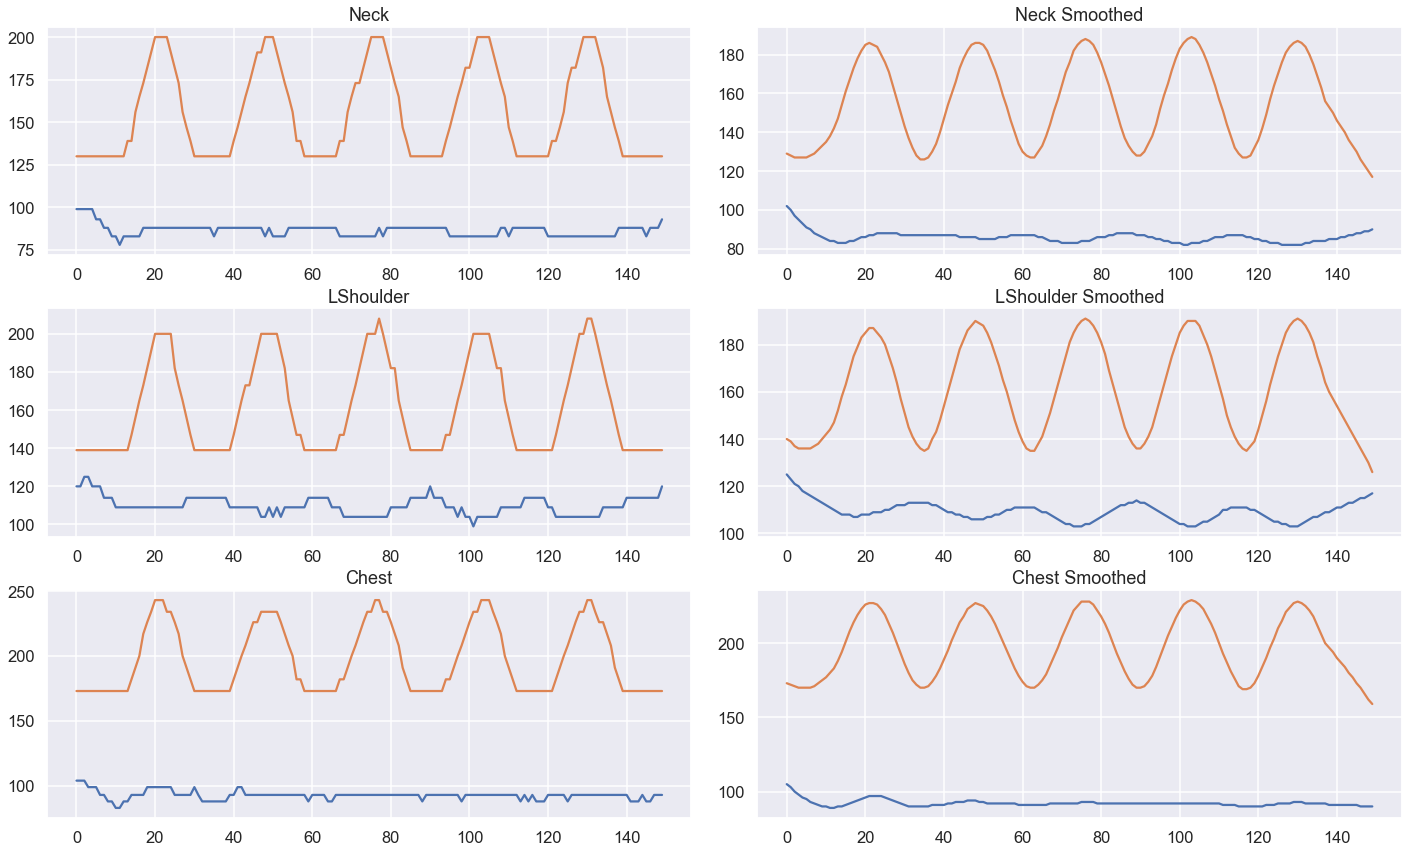

In [ ]:
"""Below we plot the time series of some body-parts pre/post smoothing. 
The smoothed ones are more fluid and less shaky """

time_series_smoothed(keypoint_good_swap,keypoint_smoothed,"../pose_output/good/clean_squat_squat_000010.csv",['Neck', 'LShoulder', 'Chest'])

---
## Creating the input data: Euclidean distance matrix
So far we have retrieved the coordinate matrices of the pose through time. The coordinates depend on the global reference frame, i.e. how the individual is positioned with respect to the camera's framing. So, following the approach of Ogata et al. (2019), we compute the Euclidean distance matrix for each body joint in time. This representation is invariant under translation and rotation of the individual and, thus, it allows to a better generalization.



In [ ]:
from scipy.spatial import distance

def creating_X(keypoints_matrix):
    """
    From the keypoint matrix it retrives the euclidean distance of the joints 
    in time. The joint pairs are collected in the global variable DISTANCE.
    
    Parameters
    -----------
    keypoints_matrix: array
    
    Returns
    --------
    X: array
    """
    print("Building X")
    X = []
    for video in keypoints_matrix:
        dict_distance = {}
        for num_frame in range(150):
            dis = []
            for pair in DISTANCE: 
                partFrom = pair[0]
                partTo = pair[1]
                idFrom = BODY_PARTS[partFrom]
                idTo = BODY_PARTS[partTo]
                coord_1 = video[idFrom, num_frame]
                coord_2 = video[idTo, num_frame]
                if type(coord_1) == str:
                    coord_1 = eval(coord_1)
                if type(coord_2) == str:
                    coord_2 = eval(coord_2)
                dis.append(distance.euclidean(coord_1,coord_2))
            dict_distance[num_frame] = dis
        X.append(pd.DataFrame(dict_distance).values[:,:,np.newaxis])
        
    X = np.array(X)
    return X 

distance_matrix = creating_X(keypoint_smoothed)


Building X


In [ ]:
def creating_y(directory):
    """
    From the directory in which are stored the OpenPose estimation, it creates 
    the dependent variable of our model. The y is composed by 0-6 label 
    depending on which squat category the video belongs to.
    
    Parameters
    ----------
    directory: directory 
    
    Returns
    -------
    y: array
    """
    
    #Finding the length of each folder in the directory
    folder_count = {}
    for folder in sorted(os.listdir(directory)):

        DIR = directory+folder+'/'
        c=0
        for file in sorted(os.listdir(DIR)):
            if not file.startswith('distance'):
                c+=1
        folder_count[folder] = c
    
    #Assigning a numerical label 0-6 (=position in the dictionary folder_count)
    #to each folder. Creating an array y in which each file has a label.
    y = []
    for index, (folder,count_file) in enumerate(folder_count.items()):
        y += [index for el in range(count_file)]
        
    y = np.array(y)
    return y

y = creating_y('../pose_output/')

In [ ]:
print(f"X shape: {(distance_matrix.shape)}")
print(f"y shape: {y.shape}")
np.save("../arrays/arrayX", distance_matrix)
np.save("../arrays/arrayY", y)

X shape: (2054, 105, 150, 1)
y shape: (2054,)


---
## Normalization steps

The following part explains all the steps that we conducted in order to normalize the dataset. We adopt **two** different **approaches**: 

* normalization **by the lenght of the torso**: we followed the same approach in Chen and Yang (2020), adapted to our dataset as we will explain in more details below;

* normalization **by the standard formula**: we applied $[x-min(x)] / [max(x)-min(x)]$ to all body pairs and frames in the video dataset. 

The goal of such normalizations is to make the dataset less volatile in terms of body shapes. Indeed, squats can be performed by different people with different bodies. Hence, it is crucial to make our model the more general we can, in order to be able to predict correct or incorrect squats for everyone! \
Additionally, dealing with a smaller input range should help the model learn. 

We will later evaluate whether these normalization techniques improve the model performance. 

Besides such normalization step, we also performed a normalization on the video frames with mean subtraction and scaling factor at the beginning of our work during the pre-processing. 

In [ ]:
# uploading complete and smoothed data
arrayX = np.load('../arrays/arrayX.npy')
arrayY = np.load('../arrays/arrayY.npy')

### Normalization type 1: rescaling by torso length

In the following code, we rescale all body distances - e.g. (left wrist, left shoulder) - by the lenght of the torso, measured as the distance between left shoulder and left hip. The choice of the torso is justified in Chen and Yang (2020) because it is the body part that remains more constant through all the input videos. The same applies in our dataset. However, in our case the person is executing a squat, and the video can either start at the beginning of the execution or during the squat. Therefore the lenght of the torso slightly varies frame by frame. For this reason, we measure the torso when the person is standing up, which coincides with the max lenght of the torso. 

**Choice of the parameters:** 
- the function `find_standing()` takes as argument the *threshold* (set by default at 15). This value is added to the value of the first frame to avoid unstable results. Indeed, it doesn't force the first frame to be standing (it's too low for this purpose), and it eliminates variations of a few units between the first frames; 
- the function `find_standing()` looks at the *33th distance*, which stands for the pair (right shoulder, right knee), and not at the overall height of a person, i.e. distance between (head, foot), because these two body points are likely to be situated  at the borders of the video, thus not getting detected. Plus, we only look at the *first 50 frames* in a video because each video contains repetitions of a squat, and we can already retrieve the max lenght of the torso by looking at the first squat, which reasonably occurs within the 50 initial frames.

In [ ]:
arrayX.shape 
# n_videos, body pairs, frames, 1

(2054, 105, 150, 1)

In [ ]:
def find_standing(arrayX, index_ofInterest, threshold=15):
        
    """
    It retrieves the n-th frame in which we can find the standing position. 
    To do so, it finds the frame in which the distance between the shoulder 
    and the knee is the greatest. This happens when the person is standing.

    Parameters
    ----------
    arrayX: array 
    index_ofInterest: int
        index of the body pair of interest according to whose length we want 
        to normaliz
    threshold: float
        Threshold used to find the standing frame
    Returns
    ----------
    dict_max_shoulder_knee: dict
        dict mapping each video to its frame in which the distance between 
        shoulder and knee is max
    """
        
    dict_max_shoulder_knee = {}
    for n_video in range(arrayX.shape[0]):
        
        line = arrayX[n_video][index_ofInterest][:50].copy() 

        #Add a threshold in the distance of the first frame
        #to avoid unstable result.
        line[0] += threshold 
        max_distance_frame = np.argmax(line)

        dict_max_shoulder_knee[n_video] = max_distance_frame

    return dict_max_shoulder_knee

def normalize(index_ofInterest, arrayX, threshold):
    """
    Normalize each video with the dimension of a body part. The length of the
    body part is found when the individual is standing.
    
    Parameters
    ----------
    index_ofInterest: int
        body pair of interest according to whose length we want to normalize
    arrayX: array
    threshold: float 
        Threshold used to find the standing frame (function: find_standing)
    Returns
    ----------
    array: array
    
    """
    index_ofInterest = DISTANCE[index_ofInterest]
    array = arrayX.copy()
  
    dic_stand = find_standing(arrayX, index_ofInterest, threshold=threshold)
  
    for number_video in range(len(arrayX)):
        frame_stand = dic_stand[number_video]
        body_part = arrayX[number_video][index_ofInterest][frame_stand]
        array[number_video] = array[number_video] / body_part

    return array 

index_ofInterest = ('LShoulder', 'LHip')
array1 = normalize(index_ofInterest,arrayX,15)

### Normalization type 2: rescaling by $[x-min(x)]/[max(x)-min(x)]$

In the following approach, we rescale each distance between body pairs with the above-mentioned formula. The min and max for each body pair are considered globally.

In other words, we use the function `finding_minmax()` to identify the min and max for each body pair across all frames and videos. Finally, we apply the above-mentioned formula with the identified values for the global max and min of each body pair.

In [ ]:
arrayX.shape 
# n_videos, body pairs, frames, 1

(2054, 105, 150, 1)

In [ ]:
def finding_minmax(arrayX_train_to_consider):
    """
    Calculate the min and max values for each body pair across all frames of 
    all videos, and return them in two separate arrays
    
    Parameters
    ----------
    arrayX_train_to_consider: 4d-array 
    
    Returns
    ----------
    array_min: array
    array_max: array
    """
    
    # comparing all videos and taking the min and the max row by row, i.e. it
    # returns two arrays - for the min and max respectively - of the body pairs
    # for each frame across videos. So, they are not global min and max yet.
    min_of_all_bodypairs = arrayX_train_to_consider[:,:,:,:].min(axis=0)
    max_of_all_bodypairs = arrayX_train_to_consider[:,:,:,:].max(axis=0)
    
    # finding the global min and max of each body pair across frames 
    array_min = min_of_all_bodypairs[:,:].min(axis=1)
    array_max = max_of_all_bodypairs[:,:].max(axis=1)
            
    return array_min, array_max


def dup_cols(a, indx, num_dups=1):
    """
    Duplicates values in a column of arrayX by adding num_dups columns. Needed 
    to be able to broadcast such array in the normalization_minmax function.
    
    Parameters
    ----------
    a: array 
    indx: int
        index representing the col to duplicate
    num_dups: int
        number of duplicates to create, that will be added next to the indx col
    Returns
    ----------
    arr: array
    """ 
    
    arr = np.insert(a,[indx+1]*num_dups,a[:,[indx]],axis=1)
    return arr


def normalization_minmax(arrayX_train_to_consider):
    """
    Applies min_max normalization to the input array. It does so for each body 
    pair, whilst min and max values are found globally
    
    Parameters
    ----------
    arrayX_train_to_consider: 4d-array
    
    Returns
    ----------
    arr: array
    """ 
    
    # find min and max value for each body pair
    min_, max_ = finding_minmax(arrayX_train_to_consider)
    
    # add filler values to get the arrays to be of the right shape
    min_ = dup_cols(min_, 0, num_dups=149)
    max_ = dup_cols(max_, 0, num_dups=149)
    min_ = min_[..., np.newaxis]
    max_ = max_[..., np.newaxis]
    
    # apply the normalization formula
    videos_normalized_2 =[]
    for i in range(len(arrayX_train_to_consider)):
        formula_normalization = (arrayX_train_to_consider[i] - min_) / (max_ - min_) 
        videos_normalized_2.append(formula_normalization)
    
    arr = np.array(videos_normalized_2)  
    return  arr


array2 = normalization_minmax(arrayX)

In [ ]:
# Checking what we did

assert array2.max() ==1
assert array2.min() ==0

So, we end up with an array whose values lie inside the range [0, 1].

### Normalization type 3: rescaling by arm length
In the following code, we rescale all body distances by the lenght of the arm, measured as the distance between right elbow and right wrist.\
We tried this approach in order to anlyze whether this kind of rescaling can lead to better results than the torso rescaling proposed by Chen and Yang (2020)

In [ ]:
index_ofInterest = ('RElbow', 'RWrist')
array3 = normalize(index_ofInterest, arrayX, 0)

In [ ]:
np.save("../arrays/array_normalization1", array1)
np.save("../arrays/array_normalization2", array2)
np.save("../arrays/array_normalization3", array3)

 Now, let's compare the performances of the model by normalization technique!

---